# Initial EDA and Cleaning

Rough initial EDA to understand the data. Like a scratch paper.

In [1]:
# import standard libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

## Title Basics data

In [2]:
title_basics = pd.read_table('files/tsv_files/title_basics.tsv', sep = '\t', na_values= ['\\N'])

C:\Users\ROG\anaconda3\envs\ML_envi\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
title_basics['titleType'].value_counts(normalize = True) * 100

tvEpisode       74.768736
short            9.858100
movie            6.935246
video            2.970315
tvSeries         2.544218
tvMovie          1.555641
tvMiniSeries     0.483338
tvSpecial        0.413501
videoGame        0.350222
tvShort          0.120658
tvPilot          0.000023
Name: titleType, dtype: float64

In [4]:
# filter only movie titles
movie_titles = title_basics[title_basics['titleType'].isin(['tvMovie','movie'])]

In [5]:
print('Shape: ', movie_titles.shape)
display(movie_titles)

Shape:  (735450, 9)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
498,tt0000502,movie,Bohemios,Bohemios,0.0,1905.0,NaN,100.0,NaN
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0.0,1906.0,NaN,70.0,"Action,Adventure,Biography"
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0.0,1907.0,NaN,90.0,Drama
610,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0.0,1907.0,NaN,NaN,Drama
625,tt0000630,movie,Hamlet,Amleto,0.0,1908.0,NaN,NaN,Drama
...,...,...,...,...,...,...,...,...,...
8661556,tt9916680,movie,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,0.0,2007.0,NaN,100,Documentary
8661561,tt9916692,tvMovie,Teatroteka: Czlowiek bez twarzy,Teatroteka: Czlowiek bez twarzy,0.0,2015.0,NaN,66,Drama
8661568,tt9916706,movie,Dankyavar Danka,Dankyavar Danka,0.0,2013.0,NaN,NaN,Comedy
8661579,tt9916730,movie,6 Gunn,6 Gunn,0.0,2017.0,NaN,116,NaN


In [6]:
movie_titles['tconst'].is_unique

True

In [7]:
# remove adult titles
movie_titles = movie_titles[movie_titles['isAdult'] == 0]
# remove end year as this is not needed.
movie_titles = movie_titles.drop(columns=['isAdult','endYear'])

### Check genres

In [8]:
# check some genre
movie_titles[(movie_titles['genres'].isnull()) & (movie_titles['startYear'] == 2020)]

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres
281025,tt0293513,movie,"Pit Bull: A Tale of Lust, Murder and Revenge",Pit Bull,2020.0,NaN,NaN
1003480,tt10063548,movie,Changing the Devil,Changing the Devil,2020.0,NaN,NaN
1019121,tt10091630,movie,The Oath,Klyatva,2020.0,125.0,NaN
1032449,tt10115496,movie,Brunch,Brunch,2020.0,NaN,NaN
1058913,tt10163134,tvMovie,Migrating to Mexico,Migrating to Mexico,2020.0,NaN,NaN
...,...,...,...,...,...,...,...
8416599,tt9390348,movie,Bushfaller,Bushfaller,2020.0,NaN,NaN
8520430,tt9614934,movie,Anomalous: The Birth,Anomalous: The Birth,2020.0,NaN,NaN
8524094,tt9622618,movie,Opera Mundi: Rigoletto Experientia,Opera Mundi,2020.0,100.0,NaN
8527124,tt9629114,movie,Music Hole,Music Hole,2020.0,80.0,NaN


No genres from the IMDB website

C:\Users\ROG\anaconda3\envs\ML_envi\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


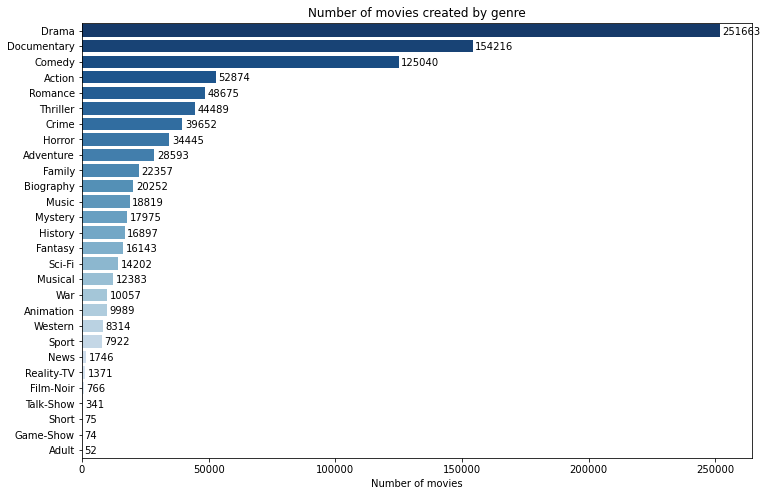

In [9]:
genres_matrix = movie_titles['genres'].str.get_dummies(',')
temp_data = genres_matrix.sum(axis = 0).sort_values(ascending = False)


plt.figure(figsize = (12,8))
plt.xlabel('Number of movies')
plt.title('Number of movies created by genre')
sns.barplot(temp_data.values, temp_data.index, orient= 'h', palette='Blues_r')

for i, counts in enumerate(temp_data):
    plt.text(counts + 1000, i + .25, counts)

In [10]:
# data for separate genres
separate_genres = movie_titles
separate_genres['genres_list'] = separate_genres['genres'].str.split(',')
# separate rows
separate_genres = separate_genres.explode('genres_list')

Run time by genre

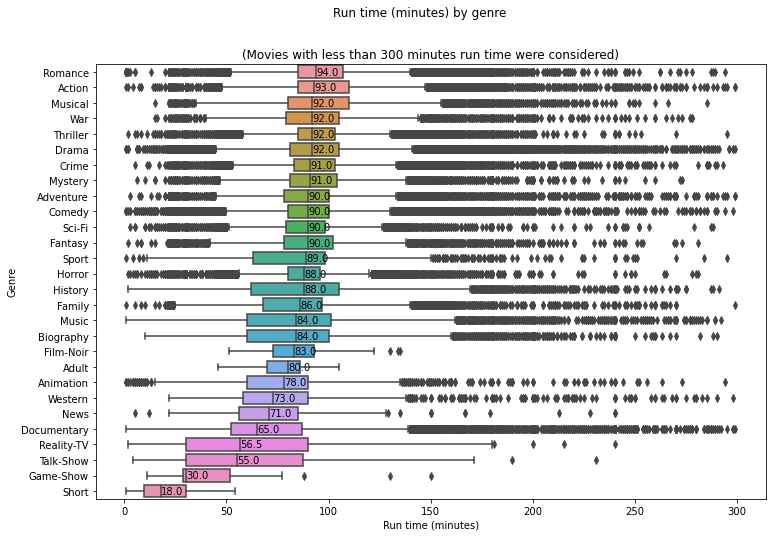

In [12]:
separate_genres['runtimeMinutes'] = separate_genres['runtimeMinutes'].astype(float)
temp_data = separate_genres[separate_genres['runtimeMinutes'] < 300]
temp_data_median = temp_data.groupby('genres_list')['runtimeMinutes'].median().sort_values(ascending = False)
order = temp_data_median.index.values

plt.figure(figsize = (12,8))
plt.suptitle('Run time (minutes) by genre')
plt.title('(Movies with less than 300 minutes run time were considered)')
sns.boxplot(data = temp_data, y = 'genres_list', x = 'runtimeMinutes', order= order)
plt.ylabel('Genre')
plt.xlabel('Run time (minutes)')

for i, rating in enumerate(temp_data_median):
    plt.text(rating + .1, i +.2, rating)

## Ratings data

In [13]:
# load ratings data
title_ratings = pd.read_table('files/tsv_files/title_ratings.tsv', na_values= ['\\N'])
title_ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1853
1,tt0000002,6.0,241
2,tt0000003,6.5,1621
3,tt0000004,6.0,156
4,tt0000005,6.2,2449


In [14]:
# merge with ratings
movie_titles = movie_titles.merge(title_ratings, how = 'left', on = 'tconst')
# merge with ratings
separate_genres = separate_genres.merge(title_ratings,how = 'left', on= 'tconst')

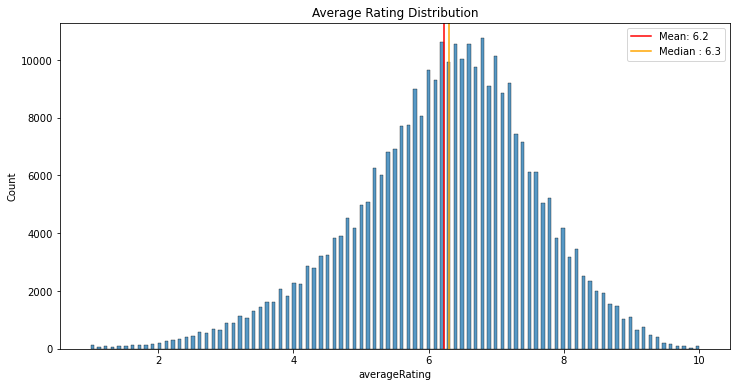

In [15]:
plt.figure(figsize = (12,6))
plt.title('Average Rating Distribution')
sns.histplot(movie_titles['averageRating'])
plt.axvline(movie_titles['averageRating'].mean(), color = 'red', label = f'Mean: {np.round(movie_titles["averageRating"].mean(),1)}')
plt.axvline(movie_titles['averageRating'].median(), color = 'orange', label = f'Median : {movie_titles["averageRating"].median()}')
plt.legend()

C:\Users\ROG\anaconda3\envs\ML_envi\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Number of votes')

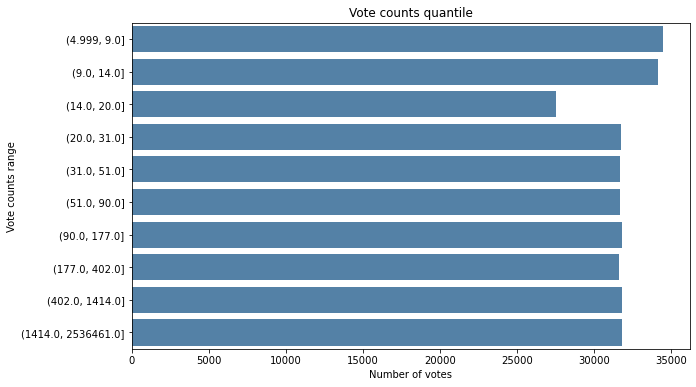

In [16]:
temp_data = pd.qcut(movie_titles['numVotes'], 10).value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.title('Vote counts quantile')
sns.barplot(temp_data.values, y = temp_data.index, orient = 'h', color = 'steelblue')
plt.ylabel('Vote counts range')
plt.xlabel('Number of votes')

80% of movies have ratings less than 402. Maybe we could use only movies with ratings at least 400 to include only top 20% movies

#### Check yearly aggregates of movie titles, number of votes, average rating

In [17]:
# temporary data for plotting year
temp_data = movie_titles.groupby('startYear').agg({'originalTitle':'count','averageRating':'mean', 'numVotes':'sum'})
temp_data = temp_data[temp_data.index < 2022]
temp_data['avgVotesPerMovie'] = temp_data['numVotes']/ temp_data['originalTitle']
temp_data.index = temp_data.index.astype(int)

C:\Users\ROG\anaconda3\envs\ML_envi\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ROG\anaconda3\envs\ML_envi\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ROG\anaconda3\envs\ML_envi\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warn

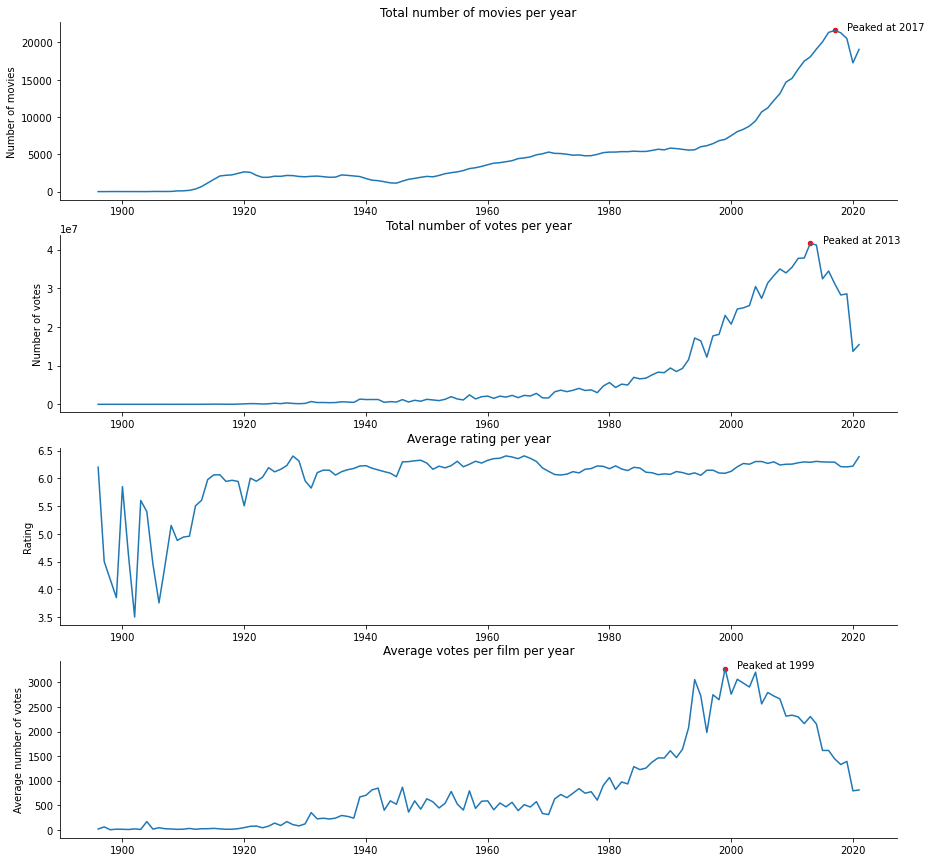

In [18]:
def plot_yearly(col, col_index, title = 'Title', xlabel = '', ylabel = 'ylabel', annot = True):
    # line plot
    sns.lineplot(temp_data.index, temp_data[col])
    plt.title(title)
    # annotation
    if annot:
        plt.text(temp_data.idxmax()[col_index] + 2,  temp_data.loc[temp_data.idxmax()[col_index], col], 'Peaked at ' + str(temp_data.idxmax()[col_index]))
        plt.scatter(temp_data.idxmax()[col_index], temp_data.loc[temp_data.idxmax()[col_index], col], color = 'red', s = 20)
        
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    
with sns.axes_style({
'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': False,
 'axes.spines.top': False
}):
    
    plt.figure(figsize=(15,15))
    # movies per year
    # Peaked during 2017
    plt.subplot(4,1,1)
    plot_yearly('originalTitle', 0, 'Total number of movies per year', xlabel='', ylabel='Number of movies')
    
    # num votes per year
    plt.subplot(4,1,2)
    plot_yearly('numVotes', 2, 'Total number of votes per year', xlabel ='', ylabel = 'Number of votes')
    # average rating per year
    plt.subplot(4,1,3)
    plot_yearly('averageRating', 1, 'Average rating per year', xlabel ='', ylabel = 'Rating', annot= False)

    # average number of votes per movie
    plt.subplot(4,1,4)
    plot_yearly('avgVotesPerMovie', 3, 'Average votes per film per year', xlabel ='', ylabel = 'Average number of votes', annot= True)

Movie ratings peaked at around 2017. Maybe we could use only data from 1980 onwards to have relatively stable number of movies and and stable average rating

#### Check top movies

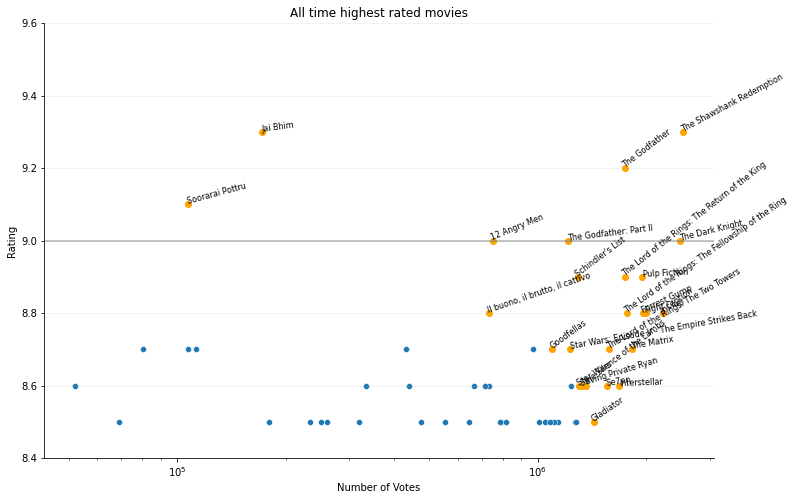

In [19]:
# at least 10k votes and at least 8.5 score
high_rated = movie_titles[(movie_titles['numVotes'] > 50000) & (movie_titles['averageRating'] >= 8.5)]
highlight = high_rated[(high_rated['averageRating'] >= 8.8) | (high_rated['numVotes'] > 1300000) | ((high_rated['numVotes'] > 1000000) & (high_rated['averageRating'] > 8.6))]

with sns.axes_style({
'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': False,
 'axes.spines.top': False
}):
    
    plt.figure(figsize=(12,8))
    sns.scatterplot(data = high_rated, y = 'averageRating', x = 'numVotes')
    plt.title('All time highest rated movies')
    plt.xlabel('Number of Votes')
    plt.ylabel('Rating')
    plt.gca().set_xscale('log')
    plt.ylim(8.4, 9.6)
    plt.grid(axis = 'y', alpha = .2)
    plt.axhline(9, color = 'gray', alpha = .6)

    for id in highlight['tconst']:
        temp_table = high_rated[high_rated['tconst'] == id]
        plt.scatter(temp_table['numVotes'].values, temp_table['averageRating'].values, color = 'orange')
        plt.text(temp_table['numVotes'].values ,temp_table['averageRating'].values, temp_table['originalTitle'].values[0], rotation=np.random.randint(0,45), rotation_mode="anchor", fontsize = 8)

Some high rated films on the left were not familiar to me.

#### Introduce shrinkage. 

Shrinkage:
- reduction in effects of sampling variation
- IMDB has this equation of weighted rating

$R_{w}$ = (v / (v+ m)) * R + (m/ (v+m)) * C

Where 
- R = rating
- v = number of votes
- m = minimum number of votes needed (currently 25000)
- C = mean vote across whole report (currently 6.5) 

If a movie has a very low number of votes, left side will be zero and the score will just be equal to the mean vote across whole report. Whereas if a movie has a very high number of votes, the right side will be zero, and the movie's rating will just be equal to the actual average rating.

In [20]:
# for now use 50k as minimum number of votes to shw difference
def compute_weighted_rating(row, min = 50000, C = 6.5):
    if (row['numVotes'] == np.nan) | (row['averageRating'] == np.nan): 
        return -1
    wr = ((row['numVotes']/ (row['numVotes'] + min)) * row['averageRating']) + ((min / (min + row['numVotes'])) * C) 
    return wr 

<ipython-input-23-1559c6f32033>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_rated['weighted_rating'] =   high_rated.apply(compute_weighted_rating, axis = 1)


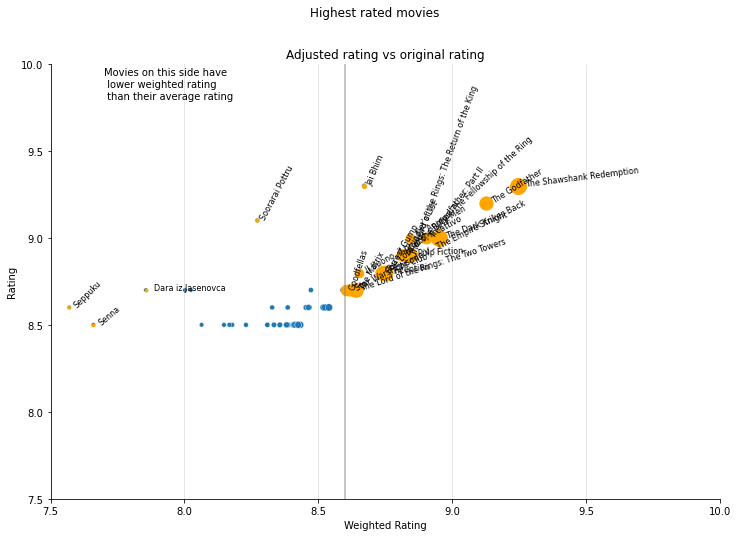

In [23]:
high_rated['weighted_rating'] =   high_rated.apply(compute_weighted_rating, axis = 1)

with sns.axes_style({
'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': False,
 'axes.spines.top': False
}):
    
    plt.figure(figsize=(12,8))
    sns.scatterplot(data = high_rated, y = 'averageRating', x = 'weighted_rating', size = 'numVotes')
    plt.suptitle('Highest rated movies')
    plt.title('Adjusted rating vs original rating')
    plt.xlabel('Weighted Rating')
    plt.ylabel('Rating')
    plt.grid(alpha = .4, axis = 'x')
    plt.ylim(7.5, 10)
    plt.xlim(7.5, 10)
    plt.legend('',frameon=False)
    plt.axvline(8.6, color = 'gray', alpha = .6)

    #straight_line = np.arange(7.5, 10.5, .5)
    #plt.plot(straight_line, straight_line, color = 'gray', alpha = .15)

    highlight = high_rated[(high_rated['averageRating'] >= 9) | ((high_rated['numVotes'] > 500000) & (high_rated['weighted_rating'] > 8.6)) | (high_rated['weighted_rating']  < 8)]
    for id in highlight['tconst']:
        temp_table = high_rated[high_rated['tconst'] == id]
        plt.scatter(temp_table['weighted_rating'].values, temp_table['averageRating'].values, color = 'orange', s = temp_table['numVotes']/10000)
        plt.text(temp_table['weighted_rating'].values + .03 ,temp_table['averageRating'].values, temp_table['originalTitle'].values[0], rotation=np.random.randint(0,75), rotation_mode="anchor", fontsize = 8)

    plt.text(7.7, 9.8, 'Movies on this side have\n lower weighted rating\n than their average rating')

#### Use this weighted rating to identify top movies in 2020

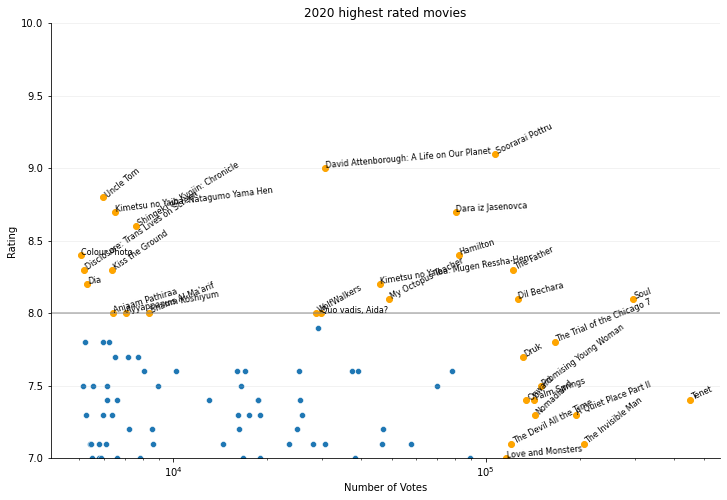

In [24]:
high_rated2020 = movie_titles[(movie_titles['startYear'] == 2020) & (movie_titles['numVotes'] > 5000) & (movie_titles['averageRating'] >= 7)]

highlight = high_rated2020[(high_rated2020['averageRating'] >= 8) | (high_rated2020['numVotes'] > 100000)]

with sns.axes_style({
'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': False,
 'axes.spines.top': False
}):
    
    plt.figure(figsize=(12,8))
    sns.scatterplot(data = high_rated2020, y = 'averageRating', x = 'numVotes')
    plt.title('2020 highest rated movies')
    plt.xlabel('Number of Votes')
    plt.ylabel('Rating')
    plt.gca().set_xscale('log')
    plt.grid(axis = 'y', alpha = .2)
    plt.ylim(7, 10)
    plt.axhline(8, color = 'gray', alpha = .6)

    for id in highlight['tconst']:
        temp_table = high_rated2020[high_rated2020['tconst'] == id]
        plt.scatter(temp_table['numVotes'].values, temp_table['averageRating'].values, color = 'orange')
        plt.text(temp_table['numVotes'].values ,temp_table['averageRating'].values, temp_table['originalTitle'].values[0], rotation=np.random.randint(0,45), fontsize = 8)

<ipython-input-25-46b96a417490>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_rated2020['weighted_rating'] =   high_rated2020.apply(compute_weighted_rating, axis = 1)


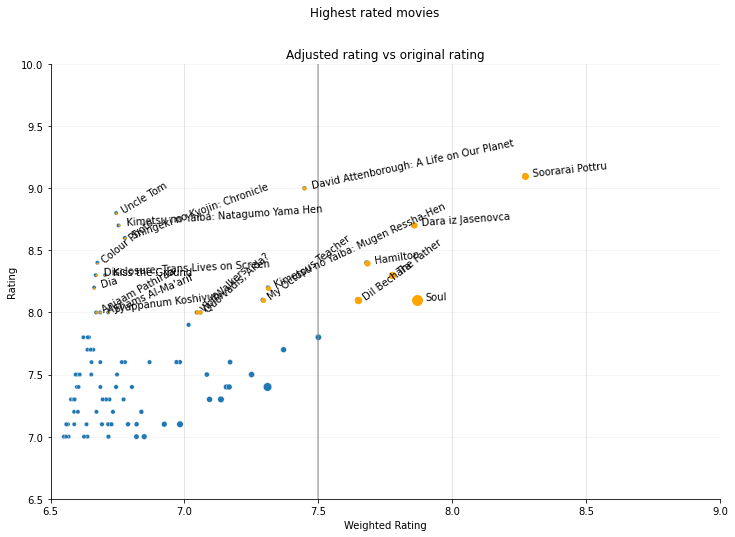

In [25]:
high_rated2020['weighted_rating'] =   high_rated2020.apply(compute_weighted_rating, axis = 1)

with sns.axes_style({
'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': False,
 'axes.spines.top': False
}):
    
    plt.figure(figsize=(12,8))
    sns.scatterplot(data = high_rated2020, y = 'averageRating', x = 'weighted_rating', size = 'numVotes')
    plt.suptitle('Highest rated movies')
    plt.title('Adjusted rating vs original rating')
    plt.xlabel('Weighted Rating')
    plt.ylabel('Rating')
    plt.grid(alpha = .15, axis = 'y')
    plt.grid(alpha = .4, axis = 'x')
    plt.ylim(6.5, 10)
    plt.xlim(6.5, 9)
    plt.legend('',frameon=False)
    plt.axvline(7.5, color = 'gray', alpha = .6)
    
    #straight_line = np.arange(7.5, 10.5, .5)
    #plt.plot(straight_line, straight_line, color = 'gray', alpha = .15)

    highlight = high_rated2020[(high_rated2020['averageRating'] >= 8) | (high_rated2020['weighted_rating'] > 7.5)]
    for id in highlight['tconst']:
        temp_table = high_rated2020[high_rated2020['tconst'] == id]
        plt.scatter(temp_table['weighted_rating'].values, temp_table['averageRating'].values, color = 'orange', s = temp_table['numVotes']/3000)
        plt.text(temp_table['weighted_rating'].values + .03 ,temp_table['averageRating'].values, temp_table['originalTitle'].values[0], rotation=np.random.randint(0,45), rotation_mode="anchor")

#### Other features vs average rating

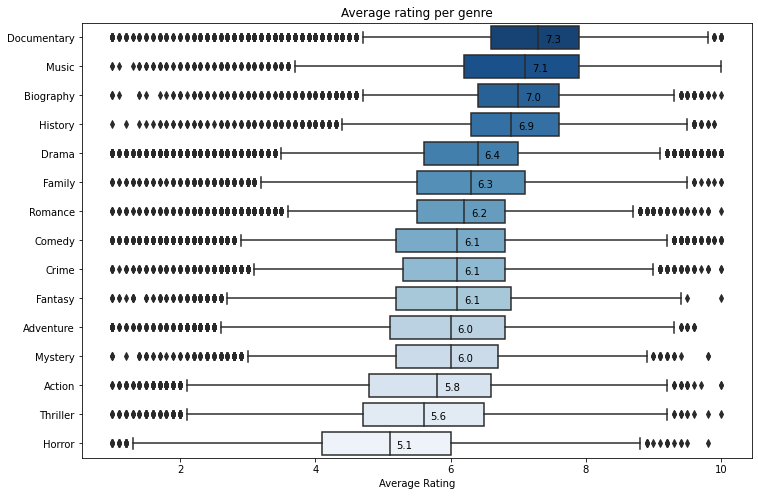

In [26]:
# temporary data
# before 2022 and with at least 500 votes
temp_data =  separate_genres[(separate_genres['genres_list'] != 'none') & (separate_genres['startYear'] < 2022)]
temp_genres =  temp_data.groupby('genres_list').agg('size').sort_values(ascending = False)[:15].index.values
temp_data = temp_data[temp_data['genres_list'].isin(temp_genres)]

plt.figure(figsize=(12,8))
genre_rating_median = temp_data.groupby('genres_list')['averageRating'].median().sort_values(ascending = False)
order = genre_rating_median.index.values
ax = sns.boxplot(data = temp_data, y = 'genres_list', x = 'averageRating', order = order, palette='Blues_r')
ax.set_title('Average rating per genre')
ax.set_ylabel('')
ax.set_xlabel('Average Rating')

for i, rating in enumerate(genre_rating_median):
    plt.text(rating + .1, i +.2, rating)

It seems that documentary, biography, history, those that can appeal more or probably have better cinematography have higher average ratings. Thriller and horror has the lowest ratings. Genre is a good feature in predicting average rating.

Check how do these ratings changed over the years for each genre

<ipython-input-31-4a07bb1688a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_data['decade'] = (temp_data['startYear']//5)*5


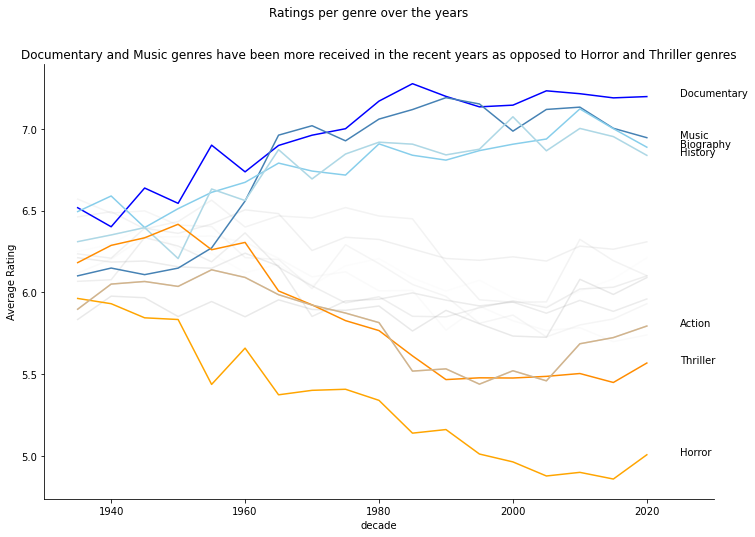

In [31]:

temp_data =  separate_genres[(separate_genres['genres_list'] != 'none') & (separate_genres['startYear'] < 2022)]
temp_data['decade'] = (temp_data['startYear']//5)*5
temp_genres =  temp_data.groupby('genres_list').agg('size').sort_values(ascending = False)[:15].index.values
temp_data = temp_data[temp_data['genres_list'].isin(temp_genres)]

temp_data =  temp_data.groupby(['decade','genres_list'])['averageRating'].mean().reset_index()
# to remove genres without ratings
temp_data = temp_data[temp_data['decade'] > 1930]


with sns.axes_style({
'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': False,
 'axes.spines.top': False
}):
    plt.figure(figsize=(12,8))
    plt.suptitle('Ratings per genre over the years')
    ax = sns.lineplot(data = temp_data[~temp_data['genres_list'].isin(['Horror','Documentary','Thriller','Biography','Music'])], y = 'averageRating', x = 'decade', hue = 'genres_list', alpha = .1, palette = 'gray')
    ax.set_title('Documentary and Music genres have been more received in the recent years as opposed to Horror and Thriller genres')
    #plot separately
    ax.plot(temp_data[temp_data['genres_list'] == 'Documentary']['decade'], temp_data[temp_data['genres_list'] == 'Documentary']['averageRating'], color = 'blue',label = 'Documentary')
    ax.plot(temp_data[temp_data['genres_list'] == 'Music']['decade'], temp_data[temp_data['genres_list'] == 'Music']['averageRating'], color = 'steelblue',label = 'Music')
    ax.plot(temp_data[temp_data['genres_list'] == 'Biography']['decade'], temp_data[temp_data['genres_list'] == 'Biography']['averageRating'], color = 'skyblue',label = 'Biography')
    ax.plot(temp_data[temp_data['genres_list'] == 'History']['decade'], temp_data[temp_data['genres_list'] == 'History']['averageRating'], color = 'lightblue',label = 'Biography')

    ax.plot(temp_data[temp_data['genres_list'] == 'Horror']['decade'], temp_data[temp_data['genres_list'] == 'Horror']['averageRating'], color = 'orange',label = 'Horror')
    ax.plot(temp_data[temp_data['genres_list'] == 'Thriller']['decade'], temp_data[temp_data['genres_list'] == 'Thriller']['averageRating'], color = 'darkorange',label = 'Thriller')
    ax.plot(temp_data[temp_data['genres_list'] == 'Action']['decade'], temp_data[temp_data['genres_list'] == 'Action']['averageRating'], color = 'tan',label = 'Action')
    plt.legend('', frameon= False)
    
    ax.set_ylabel('Average Rating')
    ax.set_xlim(1930, 2030)
    labels = ['Documentary','Music','Horror','Thriller','Biography','History', 'Action']


    for label in labels: 
        temp_table = temp_data[temp_data['genres_list'] == label]
        ax.annotate(label, xy=(2025, temp_table[temp_table['decade'] == temp_table['decade'].max()]['averageRating']))

#### Wordcloud on separate decades

In [32]:
# metadata 
metadata = pd.read_csv('files/tmd/movies_metadata.csv')
keywords = pd.read_csv('files/tmd/keywords.csv')

C:\Users\ROG\anaconda3\envs\ML_envi\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [33]:
for_keywords = metadata.merge(movie_titles, how = 'inner', left_on= 'imdb_id', right_on='tconst')

In [34]:
keywords['id'] = keywords['id'].astype(int)
for_keywords['id'] = for_keywords['id'].astype(int)
for_keywords = for_keywords[['startYear','primaryTitle','id']].merge(keywords, how = 'left', on = 'id')
# remove null and no values
for_keywords = for_keywords[for_keywords['keywords'].notnull()]
for_keywords = for_keywords[for_keywords['keywords'] != '[]']

In [35]:
import ast

# get elements from json
def get_list_from_json(string, key = 'name'):
    elements_list = []
    try:
        element_json =  ast.literal_eval(string)
        for dictionary in element_json:
            elements_list.append(dictionary[key])
    except ValueError:
        return 'Error'

    return elements_list

for_keywords['keywords'] = for_keywords['keywords'].apply(get_list_from_json)

In [36]:
for_keywords = for_keywords.explode('keywords')
for_keywords['decade'] = (for_keywords['startYear']//5)*5

In [37]:
from unidecode import unidecode
import multidict as multidict
import re
for_keywords['keywords'] = for_keywords['keywords'].apply(unidecode)

def getFrequencyDictForText(sentence):
    fullTermsDict = multidict.MultiDict()
    tmpDict = {}

    # making dict for counting frequencies
    for text in sentence.split(" "):
        if re.match("a|the|an|the|to|in|for|of|or|by|with|is|on|that|be", text):
            continue
        val = tmpDict.get(text, 0)
        tmpDict[text.lower()] = val + 1
    for key in tmpDict:
        fullTermsDict.add(key, tmpDict[key])
    return fullTermsDict



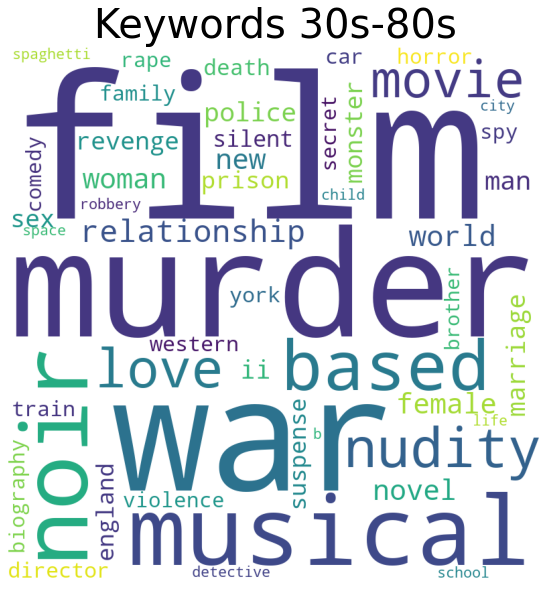

In [38]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS) 

temp_data = for_keywords[for_keywords['decade'] < 1980]['keywords'].str.lower().values


def plot_word_cloud(text_list, title):

    text = getFrequencyDictForText(' '.join(temp_data))
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                max_words = 50, 
                stopwords = stopwords, 
                min_font_size = 8).generate_from_frequencies(text) 


    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.title(title, fontsize = 40)
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

plot_word_cloud(temp_data, 'Keywords 30s-80s')

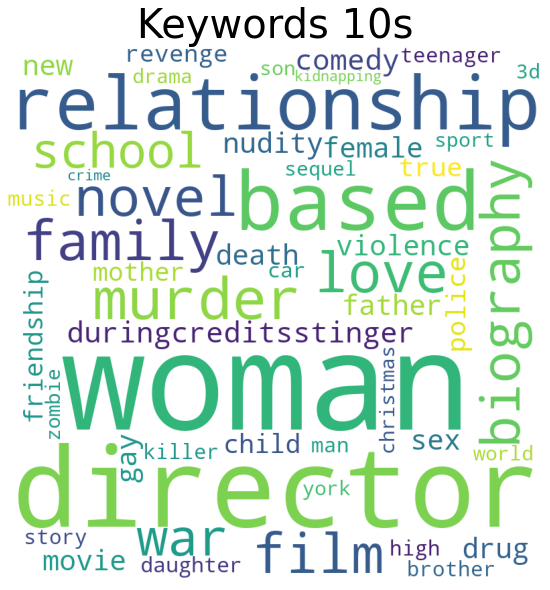

In [39]:
temp_data = for_keywords[(for_keywords['decade'] >= 2010)]['keywords'].str.lower().values
plot_word_cloud(temp_data, 'Keywords 10s')

In [40]:
# add weighted rating on genre
separate_genres['weighted_rating'] =   separate_genres.apply(compute_weighted_rating, min = 50000, C = 6.5, axis = 1)

How do runtime minutes affect the ratings

<ipython-input-41-f77639fef0dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_data['runtime_bins'] =  pd.qcut(temp_data['runtimeMinutes'], 10, precision= 0)


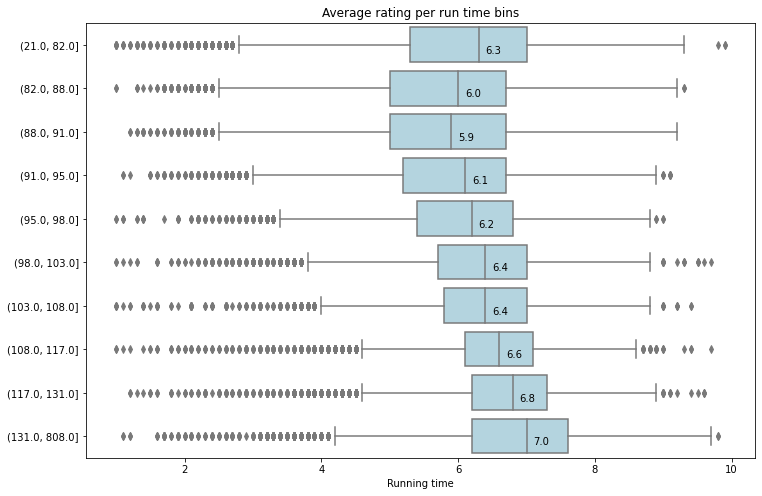

In [41]:
temp_data = separate_genres[separate_genres['numVotes'] > 500]
temp_data['runtime_bins'] =  pd.qcut(temp_data['runtimeMinutes'], 10, precision= 0)

plt.figure(figsize=(12,8))
runtime_rating_median = temp_data.groupby('runtime_bins')['averageRating'].median().sort_index()
order = runtime_rating_median.index.values
ax = sns.boxplot(data = temp_data, y = 'runtime_bins', x = 'averageRating', order = order, color = 'lightblue')
ax.set_title('Average rating per run time bins')
ax.set_ylabel('')
ax.set_xlabel('Running time')

for i, rating in enumerate(runtime_rating_median):
    plt.text(rating + .1, i +.2, rating)

Movies with higher run time generally have higher ratings.

## Title Akaz

In [42]:
title_akaz = pd.read_table('files/tsv_files/title_akaz.tsv', na_values= ['\\N'])

C:\Users\ROG\anaconda3\envs\ML_envi\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [43]:
# movie releases in other countries
title_akaz.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,NaN,imdbDisplay,NaN,0.0
1,tt0000001,2,Carmencita,DE,NaN,NaN,literal title,0.0
2,tt0000001,3,Carmencita - spanyol tánc,HU,NaN,imdbDisplay,NaN,0.0
3,tt0000001,4,Καρμενσίτα,GR,NaN,imdbDisplay,NaN,0.0
4,tt0000001,5,Карменсита,RU,NaN,imdbDisplay,NaN,0.0


In [44]:
# rename regions
import pycountry
region_list = title_akaz['region'].value_counts().index
region_list = pd.Series(region_list)

list_alpha_2 = [i.alpha_2 for i in list(pycountry.countries)]
list_alpha_3 = [i.alpha_3 for i in list(pycountry.countries)]  

def get_code(code):
    if len(code) == 2 and code in list_alpha_2: 
        return pycountry.countries.get(alpha_2 = code).name 
    if len(code) == 3 and code in list_alpha_3: 
        return pycountry.countries.get(alpha_3 = code).name 
    else:
        return 'invalid code'

region_code = region_list.apply(get_code)
region_df = pd.DataFrame({'region_code' : region_list, 'region_name': region_code})

In [45]:
# merge both
title_akaz = title_akaz.merge(region_df, how = 'left', left_on= 'region', right_on='region_code')
movies_akaz = movie_titles.merge(title_akaz, how = 'left', left_on='tconst', right_on='titleId')

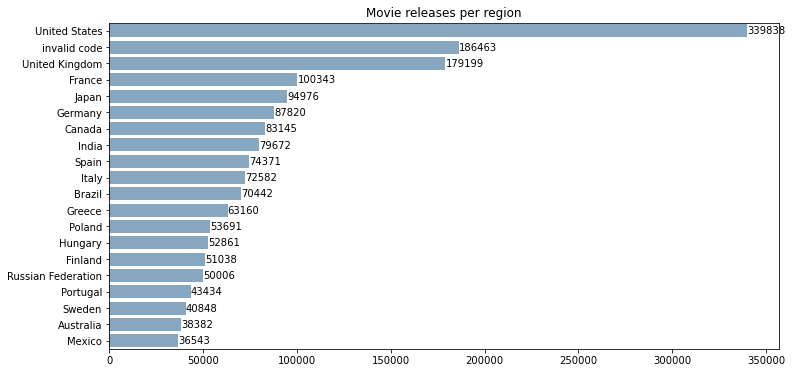

In [46]:
top_regions = movies_akaz.groupby('region_name').agg('size').sort_values(ascending = False)[:20]
plt.figure(figsize=(12,6))
plt.title('Movie releases per region')
sns.barplot(y = top_regions.index, x = top_regions.values, orient= 'h', color='steelblue', alpha = .7)
plt.ylabel('')
plt.xlabel('')

for i, num_movies in enumerate(top_regions):
    plt.text(num_movies,i,num_movies,va="center")

As expected, US has the highest number of movie releases

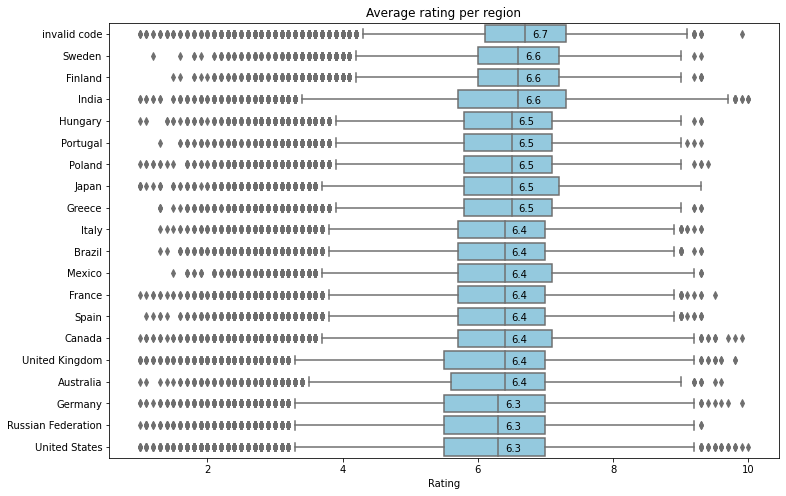

In [47]:
temp_table = movies_akaz[(movies_akaz['numVotes'] > 500) & movies_akaz['region_name'].isin(top_regions.index)]

plt.figure(figsize=(12,8))
region_rating = temp_table.groupby('region_name')['averageRating'].median().sort_values(ascending = False)
order = region_rating.index.values
ax = sns.boxplot(data = temp_table, y = 'region_name', x = 'averageRating', order = order, color = 'skyblue')
ax.set_title('Average rating per region')
ax.set_ylabel('')
ax.set_xlabel('Rating')

for i, rating in enumerate(region_rating):
    plt.text(rating + .1, i +.2, rating)

Very similar but Sweden and Finland and sweden tends to rate higher. As a director it wont matter to use because you want your to get US audience as US has the most number of movie releases.


In [48]:
# those without regions are mostly original
movies_akaz[movies_akaz['region_name'].isnull()]['types'].value_counts(normalize = True)

original               0.982903
working                0.013224
alternative            0.001899
imdbDisplay            0.001703
video                  0.000145
dvd                    0.000053
festival               0.000038
tv                     0.000028
dvdvideo              0.000002
alternativedvd        0.000002
imdbDisplayworking    0.000002
festivalworking       0.000002
Name: types, dtype: float64

#### Check the number of unique regions and movie ratings

In [49]:
unique_regions = movies_akaz.groupby('tconst')['region_name'].nunique()
movies_akaz.set_index('tconst', inplace = True)
movies_akaz['unique_regions'] = unique_regions
movies_akaz.reset_index(inplace = True)

<ipython-input-50-2b24f3e77273>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_table['unique_regions_bins'] =  pd.qcut(temp_table['unique_regions'], 10, duplicates='drop')


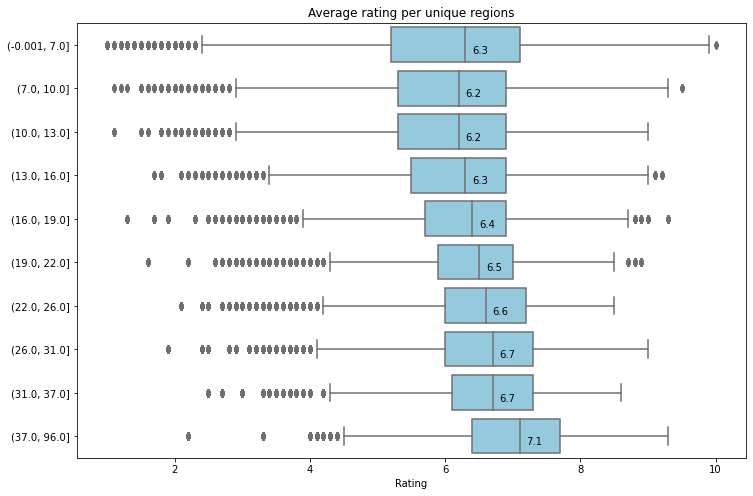

In [50]:
temp_table = movies_akaz[(movies_akaz['numVotes'] > 500)]
temp_table['unique_regions_bins'] =  pd.qcut(temp_table['unique_regions'], 10, duplicates='drop')

plt.figure(figsize=(12,8))
num_regions_rating = temp_table.groupby(pd.qcut(temp_table['unique_regions'], 10, duplicates='drop'))['averageRating'].median().sort_index()
order = num_regions_rating.index.values
ax = sns.boxplot(data = temp_table,y = 'unique_regions_bins', x = 'averageRating', order = order, color= 'skyblue')
ax.set_title('Average rating per unique regions')
ax.set_ylabel('')
ax.set_xlabel('Rating')

for i, rating in enumerate(num_regions_rating):
    plt.text(rating + .1, i +.2, rating)

It seems that those movies that were shown in more regions have higher ratings. Becareful to include this in your model, because there might be a leakage. It is possible that these movies were shown to other regions because they are high rated in the first place. 

In [51]:
# similar rating, wont be helpful.
movies_akaz.groupby('isOriginalTitle')['averageRating'].mean()

isOriginalTitle
0.0    6.213733
1.0    6.212738
Name: averageRating, dtype: float64

## Name basics

This data contains about the people related in movie industries. 

Reserve it for now and maybe use it next time, but for now we are more interested in the role of these actors on the movies.

In [52]:
name_basics = pd.read_table('files/tsv_files/name_basics.tsv', na_values= ['\\N'])

In [44]:
# # us_release = movies_akaz[movies_akaz['region_name'] == 'United States'][['tconst','region_name']]
# # us_release = us_release.drop_duplicates()

# # consider only those with US releases
# movie_titles = movie_titles.merge(us_release, how = 'inner', on ='tconst')

## Title Crew

In [53]:
title_crew = pd.read_table('files/tsv_files/title_crew.tsv', na_values= ['\\N'])

In [54]:
title_crew['tconst'].is_unique

True

In [55]:
def count_entries(string):
    try: 
        string_list = string.split(',')
        return len(string_list)
    except AttributeError:
        return 0

title_crew['num_directors'] = title_crew['directors'].apply(count_entries)
title_crew['num_writers'] = title_crew['writers'].apply(count_entries)

In [56]:
movie_titles = movie_titles.merge(title_crew, on ='tconst', how = 'inner')

In [57]:
movie_titles['num_directors'] = title_crew['directors'].apply(count_entries)
movie_titles['num_writers'] = title_crew['writers'].apply(count_entries)

In [58]:
movie_titles['num_directors'] = movie_titles['num_directors'].apply(lambda x: "4+" if x >= 4 else str(x))
movie_titles['num_writers'] = movie_titles['num_writers'].apply(lambda x: "4+" if x >= 4 else str(x))

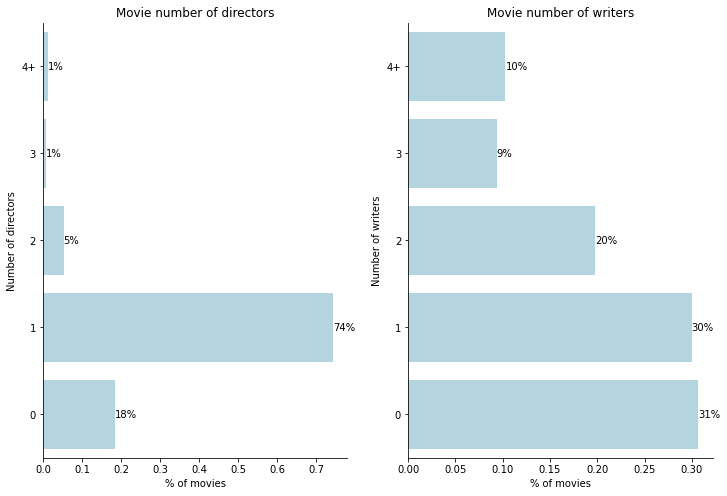

In [59]:
with sns.axes_style({
'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': False,
 'axes.spines.top': False
}):
        
    plt.figure(figsize = (12,8))
    plt.subplot(1,2,1)
    # plot number of directors
    temp_data = movie_titles['num_directors'].value_counts(normalize = True).sort_index(ascending = False)
    plt.title('Movie number of directors')
    sns.barplot(x = temp_data.values, y = temp_data.index, color = 'lightblue')
    plt.xlabel('% of movies')
    plt.ylabel('Number of directors')
    for i, num_movies in enumerate(temp_data):
        plt.text(num_movies,i,str(int(np.round(num_movies * 100))) +'%' ,va="center")
    # number of wrriters

    plt.subplot(1,2,2)
    temp_data = movie_titles['num_writers'].value_counts(normalize = True).sort_index(ascending = False)
    plt.title('Movie number of writers')
    sns.barplot(x = temp_data.values, y = temp_data.index, color = 'lightblue')
    plt.xlabel('% of movies')
    plt.ylabel('Number of writers')
    for i, num_movies in enumerate(temp_data):
        plt.text(num_movies,i,str(int(np.round(num_movies * 100))) +'%' ,va="center")

There is no difference in the average rating if a movie has more number of directors or not.

In [60]:
# select only movies with at least 500 votes
temp_data = movie_titles[movie_titles['numVotes'] > 500]
pd.concat([temp_data.groupby('num_directors').agg({'averageRating':['mean','median']}).reset_index(), 
    temp_data.groupby('num_writers').agg({'averageRating':['mean','median']}).reset_index()], axis = 1)

num_directors averageRating        num_writers averageRating       
                         mean median                      mean median
0             0      6.087915    6.3           0      6.126712    6.3
1             1      6.220624    6.4           1      6.182547    6.4
2             2      6.218060    6.4           2      6.255330    6.4
3             3      6.208244    6.4           3      6.280603    6.4
4            4+      6.181818    6.4          4+      6.226111    6.4

In [61]:
# temporary data for directors data
temp_data = movie_titles[(movie_titles['numVotes'] > 500) & (movie_titles['directors'].notnull())]
temp_data = temp_data.drop(columns=['num_directors', 'num_writers'])
temp_data['directors_list'] = temp_data['directors'].apply(lambda x: x.split(','))
temp_data = temp_data.explode('directors_list')

temp_data = temp_data.merge(name_basics[['nconst','primaryName']], how = 'left', left_on='directors_list', right_on = 'nconst')

#### Director's experience vs movie rating

In [62]:
# add weighted raitng
temp_data['weighted_rating'] =  temp_data.apply(compute_weighted_rating , axis = 1)

Text(45, 8, 'Pearsons R: 0.06')

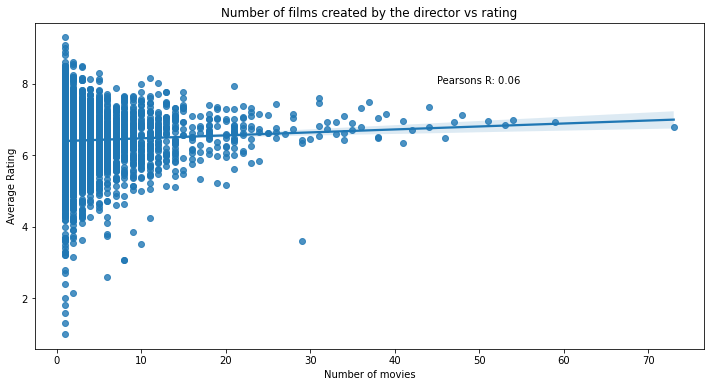

In [63]:
temp_data_directors =  temp_data.groupby('primaryName').agg({'averageRating':'mean','numVotes':'mean','tconst':'count', 'weighted_rating':'mean'})
temp_data_directors = temp_data_directors[temp_data_directors['numVotes'] > 10000]
plt.figure(figsize=(12,6))
plt.title("Number of films created by the director vs rating")
sns.regplot(data = temp_data_directors, x = 'tconst', y ='averageRating')
plt.ylabel('Average Rating')
plt.xlabel('Number of movies')
plt.text(45, 8, 'Pearsons R: ' + str(np.round(np.corrcoef(temp_data_directors['tconst'], temp_data_directors['averageRating'])[0,1], 2)))

Seems like a weak relationship. We cannot say that more experienced directors will have higher rated movies

#### Well known directors vs rating.

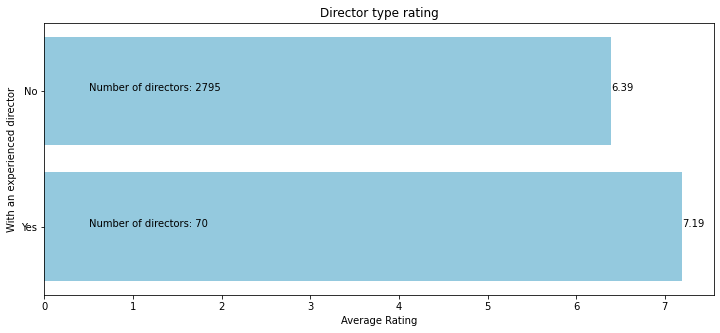

In [64]:
temp_data_directors['well_known_director'] = ((temp_data_directors['numVotes'] > 250000) & (temp_data_directors['tconst'] > 3)).astype(int)
temp_data_directors = temp_data_directors.drop_duplicates()
temp_data_directors_agg = temp_data_directors.groupby('well_known_director').agg({'tconst':'count','averageRating':'mean'})
temp_data_directors_agg.index = ['No','Yes']
temp_data_directors_agg.reset_index(inplace= True)
plt.figure(figsize=(12,5))
sns.barplot(data = temp_data_directors_agg, x = 'averageRating', y = 'index', color = 'skyblue')
plt.xlabel('Average Rating')
plt.ylabel('With an experienced director')
plt.title('Director type rating')
for i, count in enumerate(temp_data_directors_agg['averageRating']):
    plt.text(count, i, np.round(count, 2))

for i, count in enumerate(temp_data_directors_agg['tconst']):
    plt.text(0.5, i, f'Number of directors: {count}')

#### Create data for movies with well known directors

In [57]:
movies_with_known_directors = movie_titles[['tconst','primaryTitle','directors']].drop_duplicates()

In [58]:
# drop missing
movies_with_known_directors = movies_with_known_directors.dropna()

movies_with_known_directors['directors_list'] = movies_with_known_directors['directors'].apply(lambda x: x.split(','))
movies_with_known_directors = movies_with_known_directors.explode('directors_list').merge(name_basics[['nconst','primaryName']], how = 'left', left_on = 'directors_list', right_on = 'nconst')

movies_with_known_directors['well_known'] = movies_with_known_directors['primaryName'].isin(temp_data_directors.index)

# drop column list
movies_with_known_directors.drop(columns=['directors_list'], inplace = True)

# combine name into list
directors = movies_with_known_directors.groupby('tconst')['primaryName'].apply(lambda x: list(x))
well_known = movies_with_known_directors.groupby('tconst')['well_known'].sum()

# set as index
movies_with_known_directors = movies_with_known_directors.drop_duplicates(subset='tconst').set_index('tconst')

# add into column
movies_with_known_directors['directors_name'] = directors
movies_with_known_directors['well_known'] = well_known

movies_with_known_directors.reset_index(inplace = True)
# save
# movies_with_known_directors.to_csv('files/movies_and_directors.csv')

### Plot successful directors

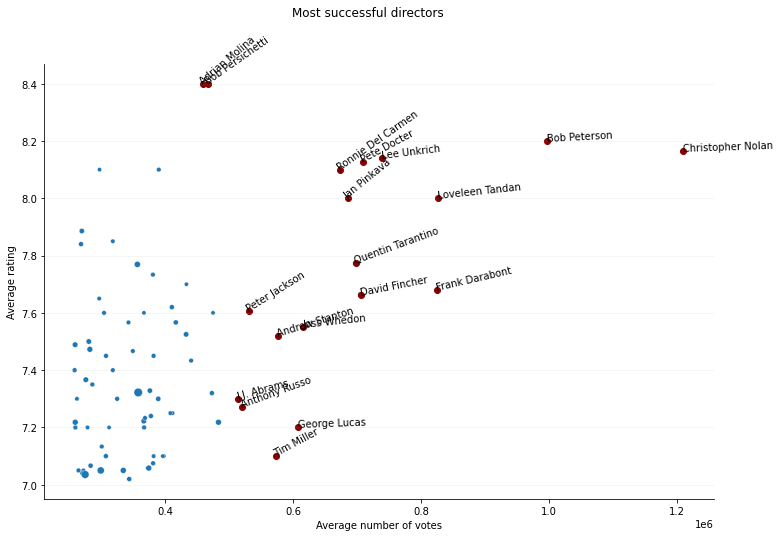

In [65]:
# plot most successful directors

temp_data_directors = temp_data_directors[(temp_data_directors['numVotes'] > 250000) & (temp_data_directors['averageRating'] > 7)]
highlight = temp_data_directors[(temp_data_directors['averageRating'] >= 8.2) | (temp_data_directors['numVotes'] >= 500000)]
with sns.axes_style({
'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': False,
 'axes.spines.top': False
}):
    
    plt.figure(figsize=(12,8))
    sns.scatterplot(data = temp_data_directors, y = 'averageRating', x = 'numVotes', size = 'tconst')
    plt.suptitle('Most successful directors')
    plt.xlabel('Average number of votes')
    plt.ylabel('Average rating')
    plt.grid(alpha = .15, axis = 'y')
    # plt.ylim(6.5, 10)
    # plt.xlim(6.5, 9)
    plt.legend('',frameon=False)
    # plt.axvline(7.5, color = 'gray', alpha = .6)

    for id in highlight.index:
        temp_table = temp_data_directors[temp_data_directors.index == id]
        plt.scatter(temp_table['numVotes'], temp_table['averageRating'], color = 'darkred')
        plt.text(temp_table['numVotes'].values + .03 ,temp_table['averageRating'].values, temp_table.index.values[0], rotation=np.random.randint(0,45), rotation_mode="anchor")
    


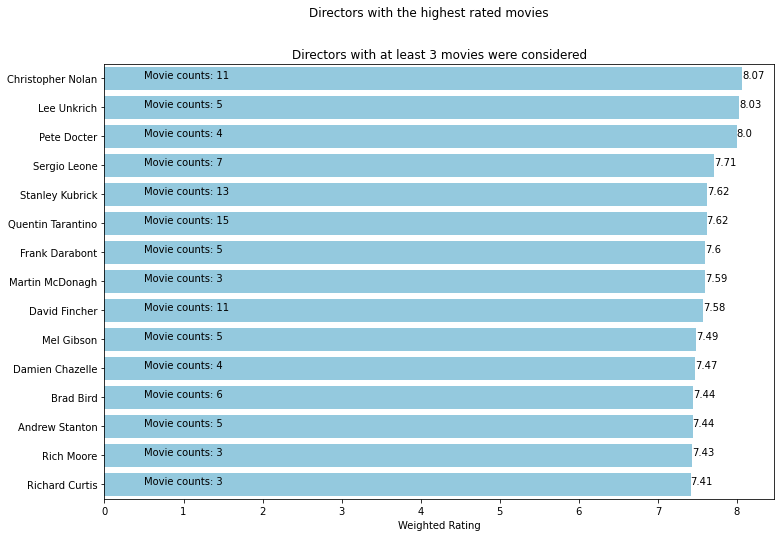

In [66]:
temp_data_directors = temp_data_directors[temp_data_directors['tconst'] > 2].sort_values(by = 'weighted_rating', ascending = False)
temp_data_directors_agg = temp_data_directors.sort_values(by = 'weighted_rating', ascending= False)[:15]

plt.figure(figsize= (12,8))
plt.suptitle('Directors with the highest rated movies')
plt.title('Directors with at least 3 movies were considered')
sns.barplot(data = temp_data_directors_agg, x = 'weighted_rating', y = temp_data_directors_agg.index, color = 'skyblue')
plt.ylabel('')
plt.xlabel('Weighted Rating')

for i, count in enumerate(temp_data_directors_agg['weighted_rating']):
    plt.text(count, i, np.round(count, 2))

for i, count in enumerate(temp_data_directors_agg['tconst']):
    plt.text(0.5, i, f'Movie counts: {count}')

## Title Principals


In [67]:
title_principals = pd.read_table('files/tsv_files/title_principals.tsv', na_values= ['\\N'])

In [68]:
title_principals = title_principals[title_principals['tconst'].notnull()]

In [69]:
actors =  title_principals[title_principals['category'].isin(['actor','actress'])]
actors.drop(columns=['job'], inplace = True)

C:\Users\ROG\anaconda3\envs\ML_envi\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [70]:
actors.head()

,tconst,ordering,nconst,category,characters
11,tt0000005,1,nm0443482,actor,"[""Blacksmith""]"
12,tt0000005,2,nm0653042,actor,"[""Assistant""]"
16,tt0000007,1,nm0179163,actor,NaN
17,tt0000007,2,nm0183947,actor,NaN
21,tt0000008,1,nm0653028,actor,"[""Sneezing Man""]"


In [71]:
# get only those with at least 500 votes
temp_data = movie_titles[movie_titles['numVotes'] > 500]
# add weighted raitng
temp_data['weighted_rating'] =   temp_data.apply(compute_weighted_rating, axis = 1)

temp_data = temp_data.merge(actors, how = 'left', on = 'tconst').merge(name_basics[['nconst','primaryName']], how = 'left', on= 'nconst')

temp_data = temp_data[temp_data['primaryName'].notnull()]

<ipython-input-71-2790776d3b38>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_data['weighted_rating'] =   temp_data.apply(compute_weighted_rating, axis = 1)


### Plot successful actors of all time

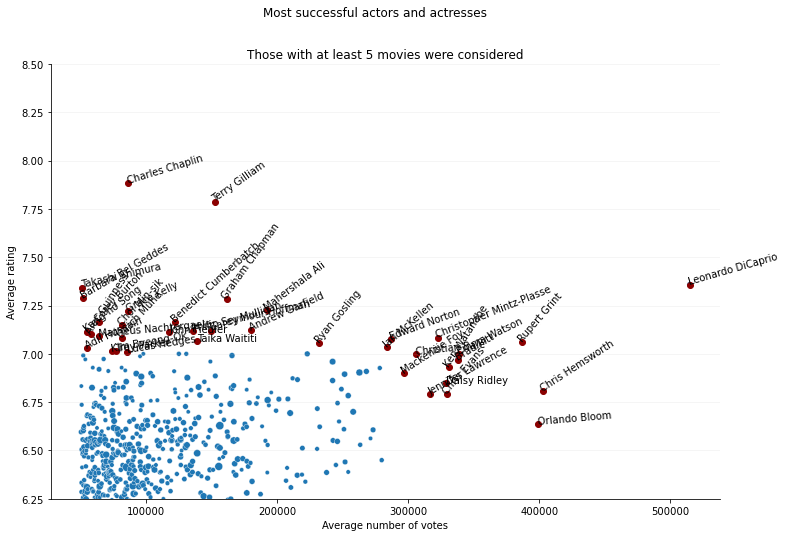

In [72]:
# get aggregates
temp_data_actors =  temp_data.groupby('primaryName').agg({'tconst':'count','averageRating':'mean','numVotes':'mean','weighted_rating':'mean'}).sort_values(by = 'numVotes')
# at least 5 movies
temp_data_actors = temp_data_actors[(temp_data_actors['tconst'] > 5)]
## plot those at least 6 and num votes > 50k
temp_data_actors = temp_data_actors[(temp_data_actors['averageRating'] > 6) & (temp_data_actors['numVotes'] > 50000)]
# highilight if rating is at least 7 or at least 280k votes
highlight = temp_data_actors[((temp_data_actors['averageRating'] > 7) & (temp_data_actors['numVotes'] > 50000)) |( temp_data_actors['numVotes'] > 280000)]

with sns.axes_style({
'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': False,
 'axes.spines.top': False
}):
    
    plt.figure(figsize=(12,8))
    sns.scatterplot(data = temp_data_actors, y = 'averageRating', x = 'numVotes', size = 'tconst')
    plt.suptitle('Most successful actors and actresses')
    plt.title('Those with at least 5 movies were considered')
    plt.xlabel('Average number of votes')
    plt.ylabel('Average rating')
    plt.grid(alpha = .15, axis = 'y')
    plt.ylim(6.25, 8.5)
    plt.legend('',frameon=False)
    # plt.axvline(7.5, color = 'gray', alpha = .6)

    for id in highlight.index:
        temp_table = temp_data_actors[temp_data_actors.index == id]
        plt.scatter(temp_table['numVotes'], temp_table['averageRating'], color = 'darkred')
        plt.text(temp_table['numVotes'].values + .03 ,temp_table['averageRating'].values, temp_table.index.values[0], rotation=np.random.randint(0,60), rotation_mode="anchor")
    


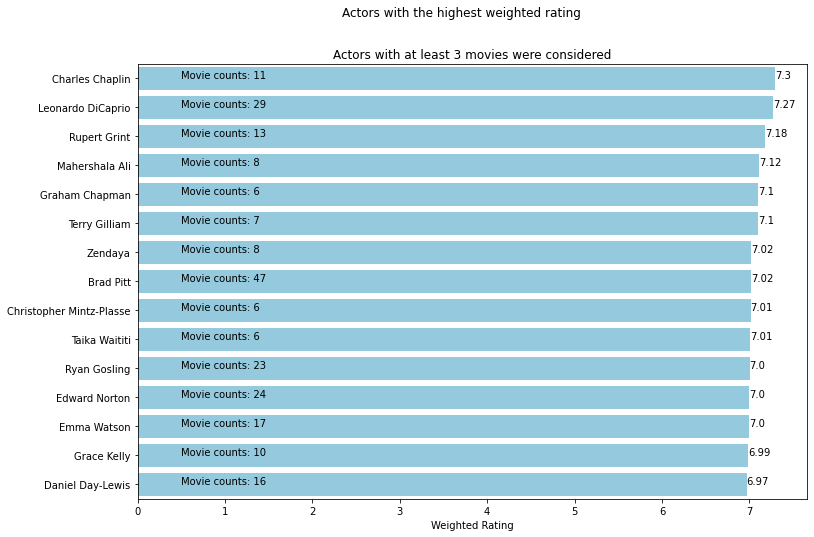

In [73]:
# barchart for those with at least 2 movies
temp_data_actors = temp_data_actors[temp_data_actors['tconst'] > 2].sort_values(by = 'weighted_rating', ascending = False)
temp_data_actors_agg = temp_data_actors.sort_values(by = 'weighted_rating', ascending= False)[:15]

plt.figure(figsize= (12,8))
plt.suptitle('Actors with the highest weighted rating')
plt.title('Actors with at least 3 movies were considered')
sns.barplot(data = temp_data_actors_agg, x = 'weighted_rating', y = temp_data_actors_agg.index, color = 'skyblue')
plt.ylabel('')
plt.xlabel('Weighted Rating')

for i, count in enumerate(temp_data_actors_agg['weighted_rating']):
    plt.text(count, i, np.round(count, 2))

for i, count in enumerate(temp_data_actors_agg['tconst']):
    plt.text(0.5, i, f'Movie counts: {count}')

### Plot for 2020

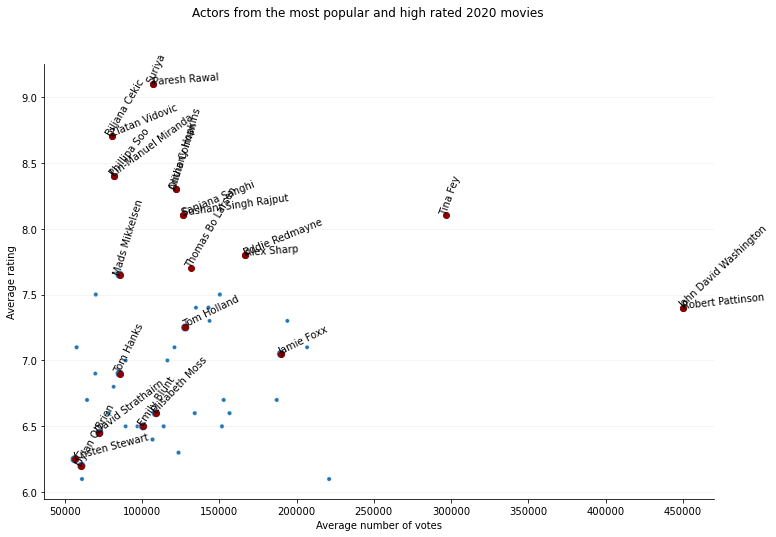

In [74]:
temp_data2020 = temp_data[temp_data['startYear'] == 2020]
# get only main characters
temp_data2020 = temp_data2020[temp_data2020['ordering'] < 3]
temp_data_actors =  temp_data2020.groupby('primaryName').agg({'tconst':'count','averageRating':'mean','numVotes':'mean','weighted_rating':'mean'}).sort_values(by = 'numVotes')

## plot for success actors
temp_data_actors = temp_data_actors[(temp_data_actors['averageRating'] > 6) & (temp_data_actors['numVotes'] > 50000)]

# plot most successful directors
highlight = temp_data_actors[((temp_data_actors['averageRating'] > 7.5) & (temp_data_actors['numVotes'] > 50000)) |( temp_data_actors['numVotes'] > 250000) | ((temp_data_actors['tconst'] > 1))]

with sns.axes_style({
'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': False,
 'axes.spines.top': False
}):
    
    plt.figure(figsize=(12,8))
    sns.scatterplot(data = temp_data_actors, y = 'averageRating', x = 'numVotes', size = 'tconst')
    plt.suptitle('Actors from the most popular and high rated 2020 movies')
    plt.xlabel('Average number of votes')
    plt.ylabel('Average rating')
    plt.grid(alpha = .15, axis = 'y')
    # plt.ylim(6.5, 10)
    # plt.xlim(6.5, 9)
    plt.legend('',frameon=False)
    # plt.axvline(7.5, color = 'gray', alpha = .6)

    for id in highlight.index:
        temp_table = temp_data_actors[temp_data_actors.index == id]
        plt.scatter(temp_table['numVotes'], temp_table['averageRating'], color = 'darkred')
        plt.text(temp_table['numVotes'].values + .03 ,temp_table['averageRating'].values, temp_table.index.values[0], rotation=np.random.randint(0,75), rotation_mode="anchor")
    


### Check for 2010 to 2020

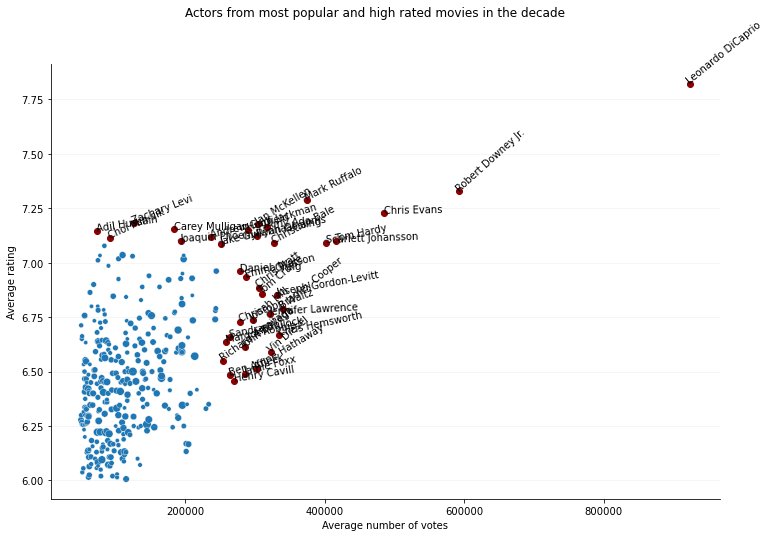

In [75]:
temp_data2020 = temp_data[(temp_data['startYear'] >= 2010) & (temp_data['startYear'] <= 2020)]
# get only main characters and at least 3 movies
temp_data2020 = temp_data2020[(temp_data2020['ordering'] < 4)]
temp_data_actors =  temp_data2020.groupby('primaryName').agg({'tconst':'count','averageRating':'mean','numVotes':'mean','weighted_rating':'mean'}).sort_values(by = 'numVotes')

## plot for success actors
temp_data_actors = temp_data_actors[(temp_data_actors['averageRating'] > 6) & (temp_data_actors['numVotes'] > 50000) & (temp_data_actors['tconst'] > 5)]

# plot most successful actors

highlight = temp_data_actors[((temp_data_actors['averageRating'] > 7.5) & (temp_data_actors['numVotes'] > 50000)) |( temp_data_actors['numVotes'] > 250000) | (temp_data_actors['averageRating'] > 7.1)]

with sns.axes_style({
'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': False,
 'axes.spines.top': False
}):
    
    plt.figure(figsize=(12,8))
    sns.scatterplot(data = temp_data_actors, y = 'averageRating', x = 'numVotes', size = 'tconst')
    plt.suptitle('Actors from most popular and high rated movies in the decade')
    plt.xlabel('Average number of votes')
    plt.ylabel('Average rating')
    plt.grid(alpha = .15, axis = 'y')
    # plt.ylim(6.5, 10)
    # plt.xlim(6.5, 9)
    plt.legend('',frameon=False)
    # plt.axvline(7.5, color = 'gray', alpha = .6)

    for id in highlight.index:
        temp_table = temp_data_actors[temp_data_actors.index == id]
        plt.scatter(temp_table['numVotes'], temp_table['averageRating'], color = 'darkred')
        plt.text(temp_table['numVotes'].values + .03 ,temp_table['averageRating'].values, temp_table.index.values[0], rotation=np.random.randint(0,45), rotation_mode="anchor")

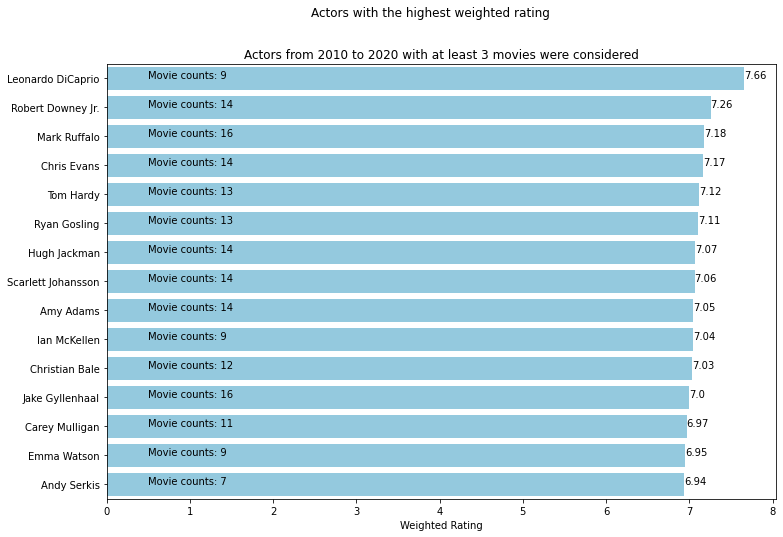

In [76]:
temp_data_actors = temp_data_actors[temp_data_actors['tconst'] > 2].sort_values(by = 'weighted_rating', ascending = False)
temp_data_actors_agg = temp_data_actors.sort_values(by = 'weighted_rating', ascending= False)[:15]

plt.figure(figsize= (12,8))
plt.suptitle('Actors with the highest weighted rating')
plt.title('Actors from 2010 to 2020 with at least 3 movies were considered')
sns.barplot(data = temp_data_actors_agg, x = 'weighted_rating', y = temp_data_actors_agg.index, color = 'skyblue')
plt.ylabel('')
plt.xlabel('Weighted Rating')

for i, count in enumerate(temp_data_actors_agg['weighted_rating']):
    plt.text(count, i, np.round(count, 2))

for i, count in enumerate(temp_data_actors_agg['tconst']):
    plt.text(0.5, i, f'Movie counts: {count}')

#### Do popular actors lead to a higher movie rating?

In [77]:
actors = actors.merge(name_basics[['nconst','primaryName']], how = 'left', on = 'nconst')

In [78]:
movie_titles_actors = movie_titles.merge(actors[['tconst','ordering','nconst','primaryName']], how = 'left')

In [79]:
temp_data = movie_titles_actors[movie_titles_actors['numVotes'] > 500]
temp_data = temp_data.drop(columns=['num_directors', 'num_writers','genres_list'])
# get only those top 4 cast
temp_data = temp_data[temp_data['ordering'] <= 4]

In [80]:
# get average rating and average number of votes along with movie counts
temp_data_actors =  temp_data.groupby('primaryName').agg({'averageRating':'mean','numVotes':'mean','tconst':'count'})

# average of 150k votes and at least 3 movies
temp_data_actors['well_known_actor'] = ((temp_data_actors['numVotes'] > 250000) & (temp_data_actors['tconst'] >= 3)).astype(int)
temp_data_actors = temp_data_actors.drop_duplicates()
temp_data_actors.reset_index(inplace = True)

# popular actors
popular_actors = temp_data_actors[temp_data_actors['well_known_actor'] == 1]

In [81]:
movie_titles_actors['with_popular_actors'] = movie_titles_actors['primaryName'].isin(popular_actors['primaryName']).astype(int)

# select needed cols
movie_titles_actors = movie_titles_actors[['tconst','primaryTitle','averageRating','numVotes','ordering','nconst','primaryName','with_popular_actors']].drop_duplicates()


actors = movie_titles_actors.groupby('tconst')['primaryName'].apply(lambda x: list(x))
well_known = movie_titles_actors.groupby('tconst')['with_popular_actors'].sum()

# make tconst as index
movie_titles_actors = movie_titles_actors.drop_duplicates(subset='tconst').set_index('tconst')
# add actors and if well known
movie_titles_actors['actors_name'] = actors
movie_titles_actors['well_known'] = well_known
# reset index
movie_titles_actors.reset_index(inplace = True)

# movie_titles_actors.to_csv('files/movies_and_actors.csv')

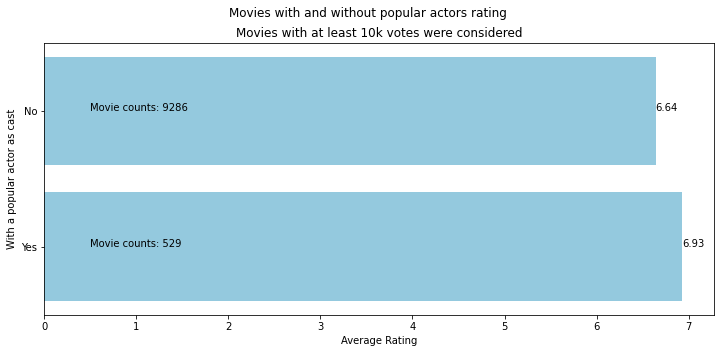

In [82]:
# select those with at least 10k votes
temp_data = movie_titles_actors[movie_titles_actors['numVotes'] > 10000]
temp_data_actors_agg = temp_data.groupby(temp_data['well_known'] > 0).agg({'tconst':'count', 'averageRating':'mean'})

temp_data_actors_agg.index = ['No','Yes']
temp_data_actors_agg.reset_index(inplace= True)


plt.figure(figsize=(12,5))
sns.barplot(data = temp_data_actors_agg, x = 'averageRating', y = 'index', color = 'skyblue')
plt.xlabel('Average Rating')
plt.ylabel('With a popular actor as cast')
plt.suptitle('Movies with and without popular actors rating')
plt.title('Movies with at least 10k votes were considered')
for i, count in enumerate(temp_data_actors_agg['averageRating']):
    plt.text(count, i, np.round(count, 2))

for i, count in enumerate(temp_data_actors_agg['tconst']):
    plt.text(0.5, i, f'Movie counts: {count}')

For movies with at least 10k votes, the use of popular actors does not increase rating by much as compared to popular directors